In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from warnings import filterwarnings
filterwarnings('ignore')
pd.set_option("display.max_columns", None)

In [2]:
df = pd.read_csv('Sales_April_2019.csv')

In [3]:
df1 = pd.read_csv('Sales_August_2019.csv')

In [4]:
df2 = pd.read_csv('Sales_December_2019.csv')

In [5]:
df3 = pd.read_csv('Sales_February_2019.csv')

In [6]:
df4 = pd.read_csv('Sales_January_2019.csv')

In [7]:
df5 = pd.read_csv('Sales_July_2019.csv')

In [8]:
df6 = pd.read_csv('Sales_June_2019.csv')

In [9]:
df7 = pd.read_csv('Sales_March_2019.csv')

In [10]:
df8 = pd.read_csv('Sales_May_2019.csv')

In [11]:
df9 = pd.read_csv('Sales_November_2019.csv')

In [12]:
df0 = pd.read_csv('Sales_October_2019.csv')

In [13]:
df11 = pd.read_csv('Sales_September_2019.csv')

In [14]:
all_data = pd.concat([df,df1,df2,df3,df4,df5,df6,df7,df8,df9,df0,df11], axis = 0)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [15]:
all_data.shape

(186850, 6)

In [16]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [17]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [18]:
all_data = all_data.dropna()

In [19]:
all_data.shape

(186305, 6)

In [20]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

As we can see here our order date column is in object type that means we are having some special characters like ?, & etc.., so now lets remove those speccial characters.

In [21]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [23]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], format='%m/%d/%y %H:%M',errors='coerce')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,2019-04-12,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30,"333 8th St, Los Angeles, CA 90001"


In [24]:
all_data['Month'] = pd.to_datetime(all_data['Order Date']).dt.month
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19,"917 1st St, Dallas, TX 75001",4.0
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07,"682 Chestnut St, Boston, MA 02215",4.0
3,176560,Google Phone,1,600,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",4.0
4,176560,Wired Headphones,1,11.99,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",4.0
5,176561,Wired Headphones,1,11.99,2019-04-30,"333 8th St, Los Angeles, CA 90001",4.0


In [25]:
all_data[['street', 'city', 'no']] = all_data['Purchase Address'].str.split(",",expand=True).rename(columns = {0:'street',1:'city',2:'no'}) 
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,street,city,no
0,176558,USB-C Charging Cable,2,11.95,2019-04-19,"917 1st St, Dallas, TX 75001",4.0,917 1st St,Dallas,TX 75001
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07,"682 Chestnut St, Boston, MA 02215",4.0,682 Chestnut St,Boston,MA 02215
3,176560,Google Phone,1,600,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",4.0,669 Spruce St,Los Angeles,CA 90001
4,176560,Wired Headphones,1,11.99,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",4.0,669 Spruce St,Los Angeles,CA 90001
5,176561,Wired Headphones,1,11.99,2019-04-30,"333 8th St, Los Angeles, CA 90001",4.0,333 8th St,Los Angeles,CA 90001


In [27]:
all_data[['Quantity Ordered','Price Each']]=all_data[['Quantity Ordered','Price Each']].apply(pd.to_numeric,errors='coerce')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,street,city,no
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19,"917 1st St, Dallas, TX 75001",4.0,917 1st St,Dallas,TX 75001
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07,"682 Chestnut St, Boston, MA 02215",4.0,682 Chestnut St,Boston,MA 02215
3,176560,Google Phone,1.0,600.00,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",4.0,669 Spruce St,Los Angeles,CA 90001
4,176560,Wired Headphones,1.0,11.99,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",4.0,669 Spruce St,Los Angeles,CA 90001
5,176561,Wired Headphones,1.0,11.99,2019-04-30,"333 8th St, Los Angeles, CA 90001",4.0,333 8th St,Los Angeles,CA 90001


In [28]:
all_data = all_data.drop(['no','street'], axis = 1)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,city
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19,"917 1st St, Dallas, TX 75001",4.0,Dallas
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07,"682 Chestnut St, Boston, MA 02215",4.0,Boston
3,176560,Google Phone,1.0,600.00,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",4.0,Los Angeles
4,176560,Wired Headphones,1.0,11.99,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",4.0,Los Angeles
5,176561,Wired Headphones,1.0,11.99,2019-04-30,"333 8th St, Los Angeles, CA 90001",4.0,Los Angeles


# Data Exploration!

Question 1: What was the best month for sales? How much was earned that month?

In [29]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each'] 
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,city,Sales
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19,"917 1st St, Dallas, TX 75001",4.0,Dallas,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07,"682 Chestnut St, Boston, MA 02215",4.0,Boston,99.99
3,176560,Google Phone,1.0,600.00,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",4.0,Los Angeles,600.00
4,176560,Wired Headphones,1.0,11.99,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",4.0,Los Angeles,11.99
5,176561,Wired Headphones,1.0,11.99,2019-04-30,"333 8th St, Los Angeles, CA 90001",4.0,Los Angeles,11.99


In [48]:
all_data_month = all_data.groupby('Month')['Sales'].sum().reset_index().sort_values('Sales', ascending=True)
all_data_month

,Month,Sales
0,1.0,1822256.73
8,9.0,2097560.13
1,2.0,2202022.42
7,8.0,2244467.88
5,6.0,2577802.26
6,7.0,2647775.76
2,3.0,2807100.38
4,5.0,3152606.75
10,11.0,3199603.20
3,4.0,3390670.24


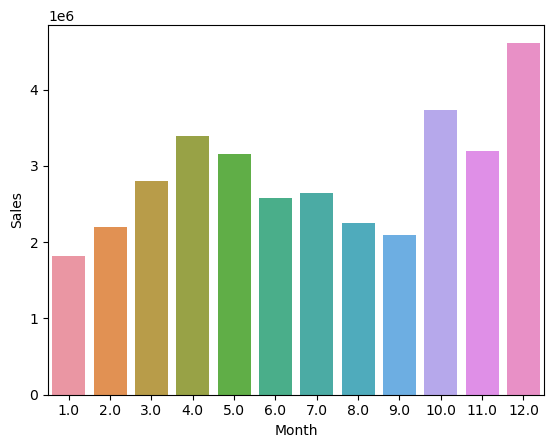

In [49]:
sns.barplot(x = 'Month',y = 'Sales', data = all_data_month)
plt.show()

From the above the graph we can observe that the sales are high in the month of december

In [46]:
all_data_city = all_data.groupby('city')['Sales'].sum().reset_index().sort_values('Sales', ascending=True)
all_data_city

,city,Sales
1,Austin,1819581.75
6,Portland,2320490.61
8,Seattle,2747755.48
3,Dallas,2767975.40
0,Atlanta,2795498.58
2,Boston,3661642.01
5,New York City,4664317.43
4,Los Angeles,5452570.80
7,San Francisco,8262203.91


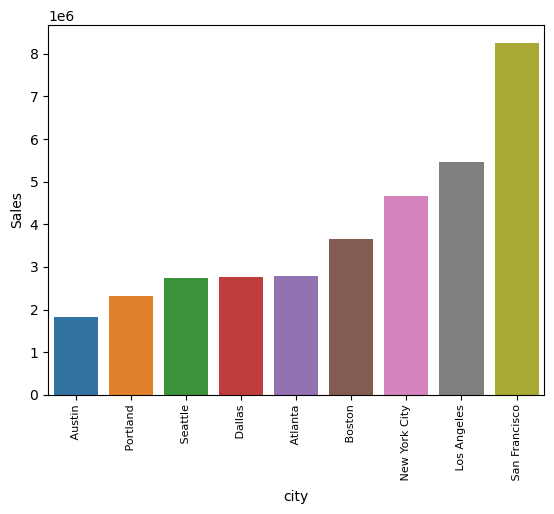

In [54]:
sns.barplot(x = 'city',y = 'Sales', data = all_data_city)
plt.xticks(rotation='vertical', size=8)
plt.show()

From the above graph we can observe that the minimum sales were in Atlanta, Dallas cities. And the maximum in San fransisco

In [59]:
all_data_city_month = all_data.groupby(['city','Month'])['Sales'].sum().reset_index().sort_values('Sales', ascending=True)
all_data_city_month

,city,Month,Sales
12,Austin,1.0,88087.06
20,Austin,9.0,106483.70
13,Austin,2.0,108787.40
72,Portland,1.0,114985.56
19,Austin,8.0,125713.61
...,...,...,...
94,San Francisco,11.0,764979.29
88,San Francisco,5.0,776679.49
87,San Francisco,4.0,812426.19
93,San Francisco,10.0,866700.98


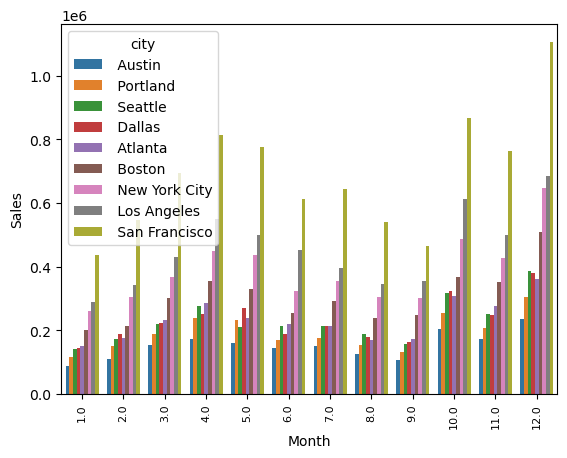

In [65]:
sns.barplot(x = 'Month',y = 'Sales', hue='city', data = all_data_city_month)
plt.xticks(rotation='vertical', size=8)
plt.show()

Question 2: What city sold the most product?

In [69]:
all_data_quantity = all_data.groupby(['city'])['Quantity Ordered'].sum().reset_index().sort_values('Quantity Ordered', ascending=True)
all_data_quantity

,city,Quantity Ordered
1,Austin,11153.0
6,Portland,14053.0
8,Seattle,16553.0
0,Atlanta,16602.0
3,Dallas,16730.0
2,Boston,22528.0
5,New York City,27932.0
4,Los Angeles,33289.0
7,San Francisco,50239.0


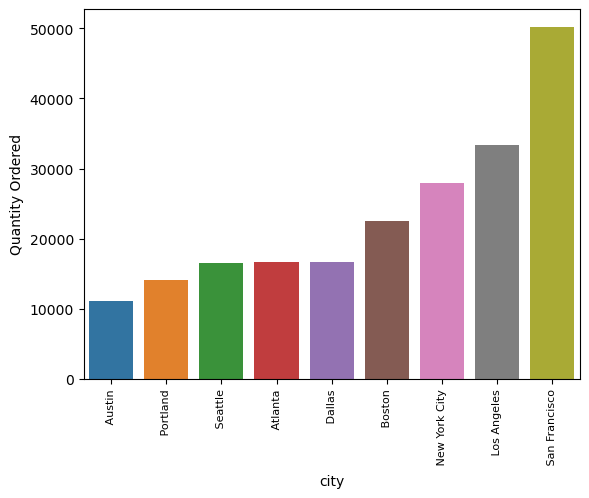

In [70]:
sns.barplot(x = 'city',y = 'Quantity Ordered', data = all_data_quantity)
plt.xticks(rotation='vertical', size=8)
plt.show()

From the above chart we can undesrstand that maximum of products were sold by San Fransisco.

Question3: What product sold the most?

In [78]:
all_data_product = all_data.groupby(['Product'])['Quantity Ordered'].sum().reset_index().sort_values('Quantity Ordered', ascending=True)
all_data_product

,Product,Quantity Ordered
14,Product,0.0
10,LG Dryer,646.0
11,LG Washing Machine,666.0
17,Vareebadd Phone,2068.0
0,20in Monitor,4129.0
15,ThinkPad Laptop,4130.0
13,Macbook Pro Laptop,4728.0
8,Flatscreen TV,4819.0
9,Google Phone,5532.0
3,34in Ultrawide Monitor,6199.0


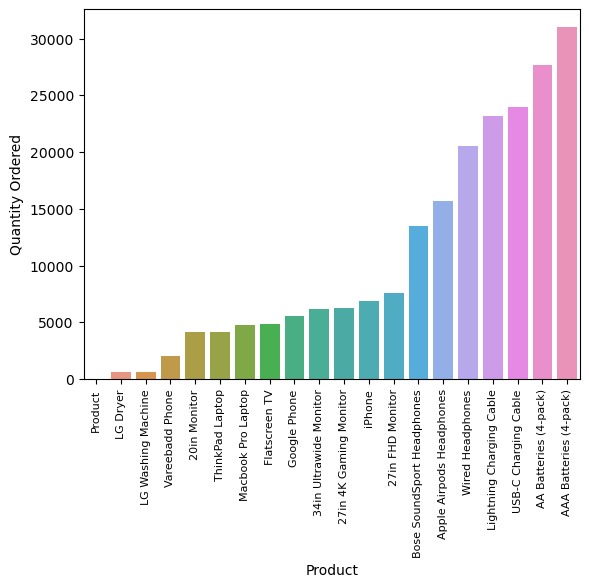

In [79]:
sns.barplot(x = 'Product',y = 'Quantity Ordered', data = all_data_product)
plt.xticks(rotation='vertical', size=8)
plt.show()

"AAA Batteries (4-pack)"	are the most ordered product